> Dana jest tablica $ 2n $ liczb rzeczywistych. Zaproponuj algorytm, który podzieli te liczby na $ n $ par w taki sposób, że podział będzie miał najmniejszą maksymalną sumę liczb w parze. Przykładowo, dla liczb $ (1, 3, 5, 9) $ możemy mieć podziały $ ((1, 3), (5, 9)) $, $ ((1, 9), (3, 5)) $ oraz $ ((1, 9), (3, 5)) $. Sumy par dla tych podziałów to odpowiednio $ (4, 14) $, $ (6, 12) $ oraz $ (10, 8) $, w związku z tym, maksymalne sumy to $ 14 $, $ 12 $ oraz $ 10 $. Wynika z tego, że ostatni podział ma najmniejszą maksymalną sumę.

### Omówienie algorytmu

Algorytm jest dosyć prosty i wymaga jedynie posortowania liczb, a następnie przechodzenia w czasie liniowym przez tablicę z obu stron i zapisywania liczb w wynikowej $ n $-elementowej tablicy odpowiednich par liczb. Zauważmy, że musimy brać zawsze pary z krańców pozostałego fragmentu tablicy, ponieważ, jeżeli nawet byśmy chcieli sparować jakąś pozostałą wartość minimalną, np. po sparowaniu już ze sobą $ (1, 15) $, gdy pozostała nam tablica:

    [10, 10, 10, 11, 12, 12, 13, 14]

z inną wartością niż wartość maksymalna tak, aby uzyskać mniejszą sumę maksymalną, pozostała wartość maksymalna musiałaby zostać sparowana z wartością większą lub równą (jeżeli liczby się powtarzają) wartości minimalnej i uzyskalibyśmy w najlepszym przypadku ten sam efekt, co podczas dobierania wartości z krańców, a często nawet gorszy.

##### Przykładowe prawidłowe łączenie w pary:

    Liczby: [1, 10, 10, 10, 11, 12, 12, 13, 14, 15]   Pary: []             Max. suma: -
    Liczby: [10, 10, 10, 11, 12, 12, 13, 14]    Pary: [(1, 15)]            Max. suma: 16
    Liczby: [10, 10, 11, 12, 12, 13]   Pary: [(1, 15), (10, 14)]           Max. suma: 24
    Liczby: [10, 11, 12, 12]    Pary: [(1, 15), (10, 14), (10, 13)]        Max. suma: 24
    Liczby: [11, 12]   Pary: [(1, 15), (10, 14), (10, 13), (10, 12)]       Max. suma: 24
    Liczby: []   Pary: [(1, 15), (10, 14), (10, 13), (10, 12), (11, 12)]   Max. suma: 24

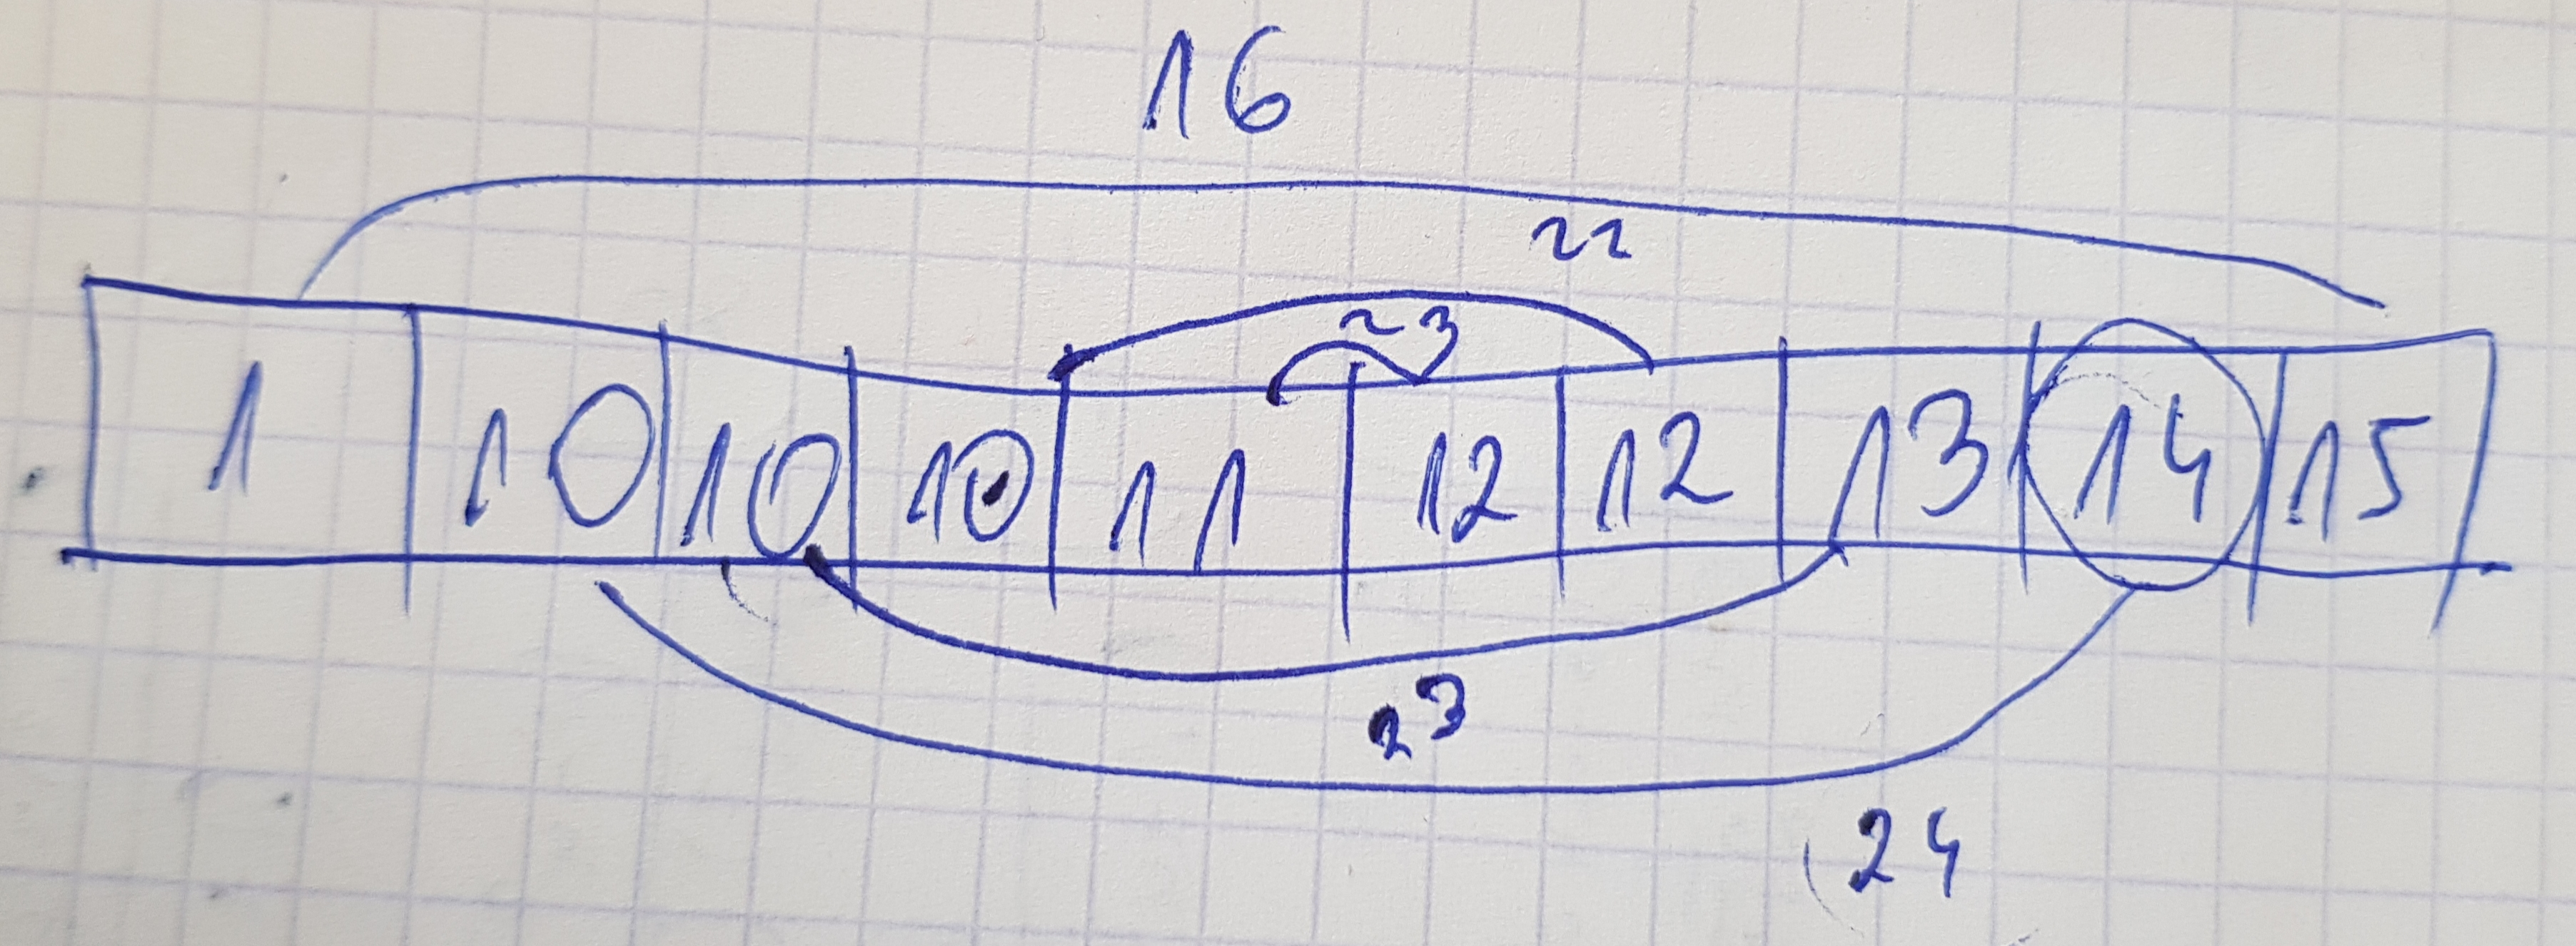

##### Dobór algorytmu sortującego

Ponieważ nie wiemy nic o rozkładzie liczb oraz o ich zakresie, ale wiemy że nie są to wyłącznie liczby całkowite (bo są to ogólnie liczby rzeczywiste), nie możemy skorzystać z Counting Sorta, Radix Sorta ani Bucket Sorta w tradycyjnej implementacji. Jednakże wciąż możemy użyć Bucket Sorta, który sortuje duże wiaderka Bucket Sortem, a małe Insertion Sortem. W ten sposób unikniemy sytuacji, w której algorytm ten osiąga najgorszą złożoność (kwadratową), gdy wszystkie lub większość wartości trafia do jednego wiaderka. W ulepszonej wersji algorytmu takie wiaderko zostanie ponownie podzielone na mniejsze wiaderka, a wystarczająco małe wiaderka będą przesortowane Insertion Sortem. Oczywiście można skorzystać z algorytmu Quick Sort, ale jest on niestabilny i ma gorszą złożoność czasową, zarówno dla optymistycznego i pesymistycznego czasu wykonania.

###### UWAGA:
Jeżeli mamy duże ograniczenie pamięciowe, np. $ O(log(n)) $, nie możemy skorzystać z Bucket Sorta (ani zazwyczaj żadnego innego liniowego sortowania, chyba, że dane wejściowe posiadają pewne cechy szczególne, które na to pozwalają). Wówczas jedyną deską ratunku pozostaje algorytm Quick Sort w takiej implementacji, która ma maksymalną złożoność pamięciową $ O(log(n)) $ w wersji rekurencyjnej lub z użyciem stosu.

### Implementacja algorytmu #1 (z ulepszonym Bucket Sortem)

In [1]:
def create_pairs(arr):
    # Sort an array of values
    bucket_sort(arr)
    # Create pairs of lowest max sum
    pairs = []
    for i in range(len(arr) // 2):
        pairs.append((arr[i], arr[-i-1]))
    # Return pairs created
    return pairs


# Use k as a thershold which idicates when to start using Insertion Sort
def bucket_sort(arr, *, k: 'threshold' = 24):
    # If a bucket is small enough, use an Insertion Sort algorithm to
    # sort this bucket
    if len(arr) <= k:
        insertion_sort(arr)
    else:
        _bucket_sort(arr, k)
        
        
def _bucket_sort(arr, k):
    # Store the maximum and the minimum value of a bucket
    min_val, max_val = minmax(arr)
    # Sort a bucket if only there is more than one unique value
    if min_val != max_val:
        # Make a threshold a bit smaller as a number of elements in each
        # bucket can slightly vary and we don't want to make unnecessary
        # recursive calls.
        m = int(2/3 * k)
        # Create buckets
        buckets_count = len(arr) // m + 1
        buckets = [[] for _ in range(buckets_count)]
        val_interval = (max_val - min_val) / buckets_count
        # Distribute values to the proper buckets
        for val in arr:
            # Calculate the bucket's index depending on how much the 
            # current value is greater than the lowest one
            bucket_idx = int((val - min_val) / val_interval - .5)
            buckets[bucket_idx].append(val)
        # Sort each bucket separately
        for bucket in buckets:
            # Bucket sort all of the buckets again
            bucket_sort(bucket, k=k)
        # Rewrite sorted values from buckets to the inintial array
        i = 0
        for bucket in buckets:
            for val in bucket:
                arr[i] = val
                i += 1
        
        
def minmax(arr):
    global_min = global_max = arr[-1]
    
    for i in range(0, len(arr)-1, 2):
        if arr[i] > arr[i+1]:
            if arr[i] > global_max:   global_max = arr[i]
            if arr[i+1] < global_min: global_min = arr[i+1]
        else:
            if arr[i+1] > global_max: global_max = arr[i+1]
            if arr[i] < global_min:   global_min = arr[i]
    return global_min, global_max


def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i-1
        temp = arr[i]
        
        while j >= 0 and temp < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        
        arr[j+1] = temp

Kilka testów

In [2]:
arr = [1, 10, 10, 10, 11, 12, 12, 13, 14, 15]

print(create_pairs(arr))
print(arr)

[(1, 15), (10, 14), (10, 13), (10, 12), (11, 12)]
[1, 10, 10, 10, 11, 12, 12, 13, 14, 15]


In [3]:
import random

arr = [round(random.random() * random.randint(-10, 10), 2) for _ in range(random.randrange(0, 21, 2))]
print('Input arr:', arr, sep='\n')
sorted_arr = sorted(arr)
print('\nSorted array (by built-in function):', sorted_arr, sep='\n')
result = create_pairs(arr)
print('\nSorted array (after calling create_pairs):', arr, sep='\n')
print('\nResult:', result)

Input arr:
[-1.45, 6.72, 0.27, -1.2, -1.18, -3.59, -1.26, 2.53, -0.02, -0.86, 5.4, 5.55, 0.8, -0.53, -0.0, 1.41, 3.5, 5.55, -0.94, -0.58]

Sorted array (by built-in function):
[-3.59, -1.45, -1.26, -1.2, -1.18, -0.94, -0.86, -0.58, -0.53, -0.02, -0.0, 0.27, 0.8, 1.41, 2.53, 3.5, 5.4, 5.55, 5.55, 6.72]

Sorted array (after calling create_pairs):
[-3.59, -1.45, -1.26, -1.2, -1.18, -0.94, -0.86, -0.58, -0.53, -0.02, -0.0, 0.27, 0.8, 1.41, 2.53, 3.5, 5.4, 5.55, 5.55, 6.72]

Result: [(-3.59, 6.72), (-1.45, 5.55), (-1.26, 5.55), (-1.2, 5.4), (-1.18, 3.5), (-0.94, 2.53), (-0.86, 1.41), (-0.58, 0.8), (-0.53, 0.27), (-0.02, -0.0)]


### Implementacja algorytmu #2 (z Quick Sortem)

In [4]:
def create_pairs(arr):
    # Sort an array of values
    bucket_sort(arr)
    # Create pairs of lowest max sum
    pairs = []
    for i in range(len(arr) // 2):
        pairs.append((arr[i], arr[-i-1]))
    # Return pairs created
    return pairs


def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1  # I removed a tailing recursion
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position  # I removed a tailing recursion
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater or equal to a pivot 
    # (in this partition algorithm pivot isn't placed on a fixed position 
    # but can be also swapped like all the remaining values)
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

Kilka testów

In [5]:
arr = [1, 10, 10, 10, 11, 12, 12, 13, 14, 15]

print(create_pairs(arr))
print(arr)

[(1, 15), (10, 14), (10, 13), (10, 12), (11, 12)]
[1, 10, 10, 10, 11, 12, 12, 13, 14, 15]


In [6]:
import random

arr = [round(random.random() * random.randint(-10, 10), 2) for _ in range(random.randrange(0, 21, 2))]
print('Input arr:', arr, sep='\n')
sorted_arr = sorted(arr)
print('\nSorted array (by built-in function):', sorted_arr, sep='\n')
result = create_pairs(arr)
print('\nSorted array (after calling create_pairs):', arr, sep='\n')
print('\nResult:', result)

Input arr:
[-8.77, 7.39, -6.85, 0.93, 1.07, -4.2, -6.4, 2.18, -1.03, 0.86, -3.2, 0.0, 0.9, -0.16, -3.43, -5.01]

Sorted array (by built-in function):
[-8.77, -6.85, -6.4, -5.01, -4.2, -3.43, -3.2, -1.03, -0.16, 0.0, 0.86, 0.9, 0.93, 1.07, 2.18, 7.39]

Sorted array (after calling create_pairs):
[-8.77, -6.85, -6.4, -5.01, -4.2, -3.43, -3.2, -1.03, -0.16, 0.0, 0.86, 0.9, 0.93, 1.07, 2.18, 7.39]

Result: [(-8.77, 7.39), (-6.85, 2.18), (-6.4, 1.07), (-5.01, 0.93), (-4.2, 0.9), (-3.43, 0.86), (-3.2, 0.0), (-1.03, -0.16)]
